## Лабораторная работа 02 (шкалы измерения)

### Задание 1: Определение типа шкалы измерения

Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

In [14]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
def detect_scale(series, ratios, ordinals):
    if series.dtype == "object" or series.dtype == "category" or series.dtype == "bool":
        if series.name in ordinals:
            return "Порядковая"
        else:
            return "Номинальная"
    else:
        if series.dtype == "int64" and series.isin([0, 1]).all():
            return "Номинальная"
        elif series.name in ratios:
            return "Отношений"
        else:
            return "Интервальная"  
        
new_titanic = titanic.drop(columns=["pclass"])
ratios = ["age", "fare", "siblings_spouses_aboard", "parch", "sibsp"]
ordinals = ["class"]
scales = {col: detect_scale(new_titanic[col], ratios, ordinals) for col in new_titanic.columns}
scales

{'survived': 'Номинальная',
 'sex': 'Номинальная',
 'age': 'Отношений',
 'sibsp': 'Отношений',
 'parch': 'Отношений',
 'fare': 'Отношений',
 'embarked': 'Номинальная',
 'class': 'Порядковая',
 'who': 'Номинальная',
 'adult_male': 'Номинальная',
 'deck': 'Номинальная',
 'embark_town': 'Номинальная',
 'alive': 'Номинальная',
 'alone': 'Номинальная'}

### Задание 2: Приведение данных к нужной шкале
Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

In [72]:
def convert_scales(df):
    df = df.copy()

    nominal_cols = ["sex", "embarked", "who", "deck", "alive", "embark_town"]
    for column in nominal_cols:
        df[column] =  pd.Categorical(df[column])

    class_order = ["Third", "Second", "First"]
    df["class"] = pd.Categorical(df["class"], categories=class_order, ordered=True)
    
    return df

titanic_scaled = convert_scales(titanic)
print(titanic_scaled.dtypes)

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
dtype: object


### Задание 3: Анализ данных с использованием различных шкал измерения
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

In [84]:
nominals = ['survived', 'sex', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
ordinals = ['class']
ratios = ['age', 'sibsp', 'parch', 'fare']
interval = []

modes = {nominal + '_mode': str(titanic_scaled[nominal].mode()[0]) for nominal in nominals}
means = {ratio + '_mean': str(titanic_scaled[ratio].mean()) for ratio in ratios}   
medians = {}
for ordinal in ordinals:
    cat_col = titanic_scaled[ordinal]
    median_code = int(cat_col.cat.codes.median())
    medians[ordinal + '_median'] = str(cat_col.cat.categories[median_code])
    
result = {**modes, **medians, **means}
result

{'survived_mode': '0',
 'sex_mode': 'male',
 'embarked_mode': 'S',
 'who_mode': 'man',
 'adult_male_mode': 'True',
 'deck_mode': 'C',
 'embark_town_mode': 'Southampton',
 'alive_mode': 'no',
 'alone_mode': 'True',
 'class_median': 'Third',
 'age_mean': '29.69911764705882',
 'sibsp_mean': '0.5230078563411896',
 'parch_mean': '0.38159371492704824',
 'fare_mean': '32.204207968574636'}

### Задание 4: Визуализация данных в зависимости от шкалы измерения
Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hapiness = pd.read_csv("2019.csv")
hapiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


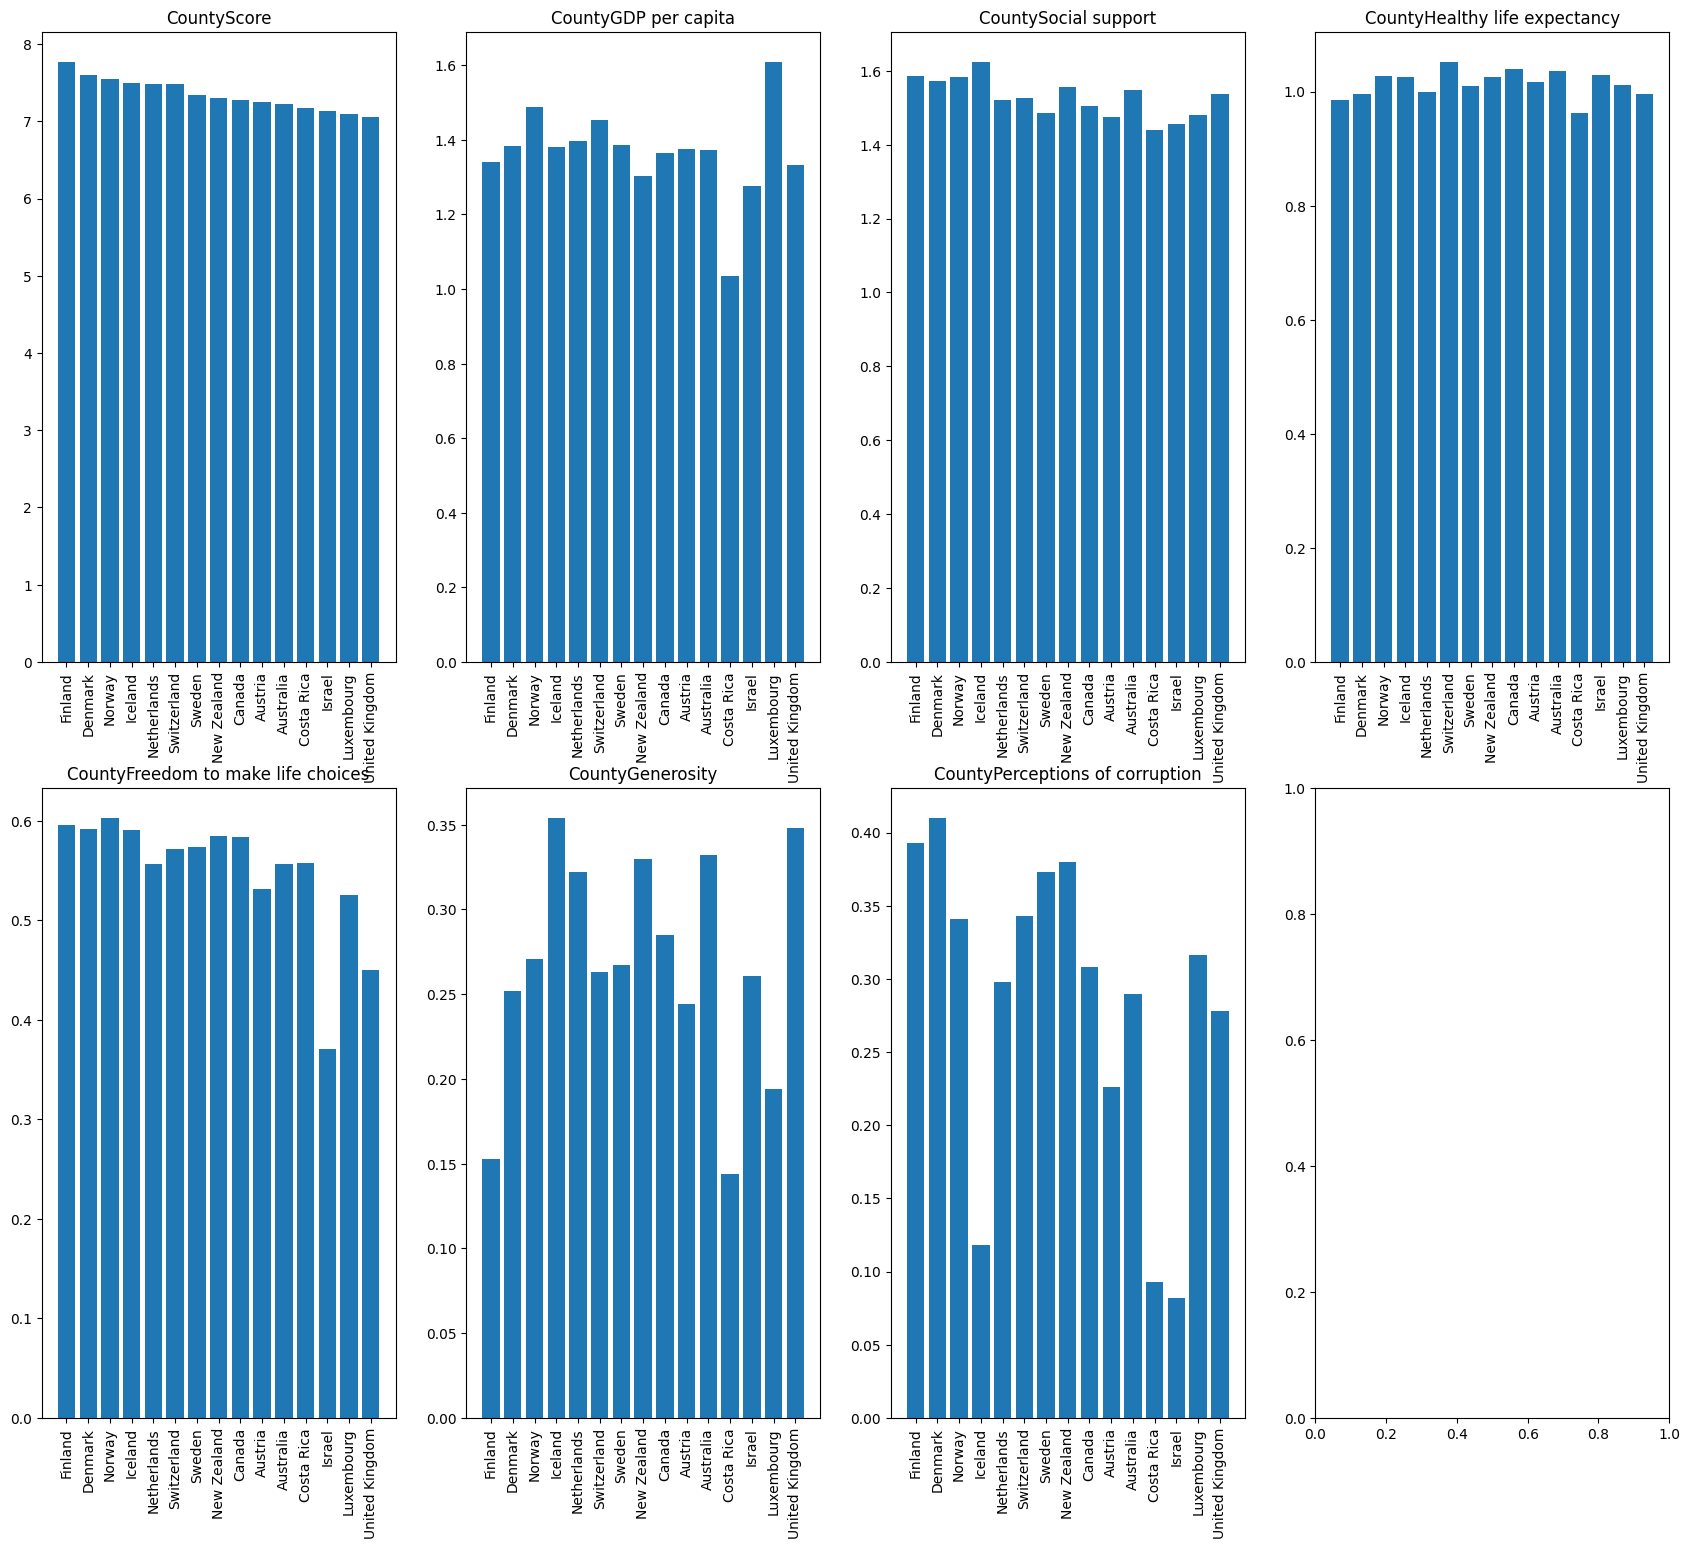

In [ ]:
hapiness_head = hapiness.head(15)
fig, axs = plt.subplots(2, 4, figsize=(21, 18))
axs = axs.flatten() 

country_or_region = 'Country or region'
country_parameters = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for i, country_parameter in enumerate(country_parameters):
    axs[i].bar(hapiness_head[country_or_region],  hapiness_head[country_parameter])
    axs[i].set_title('County' + country_parameter)
    axs[i].tick_params(axis='x', rotation=90)

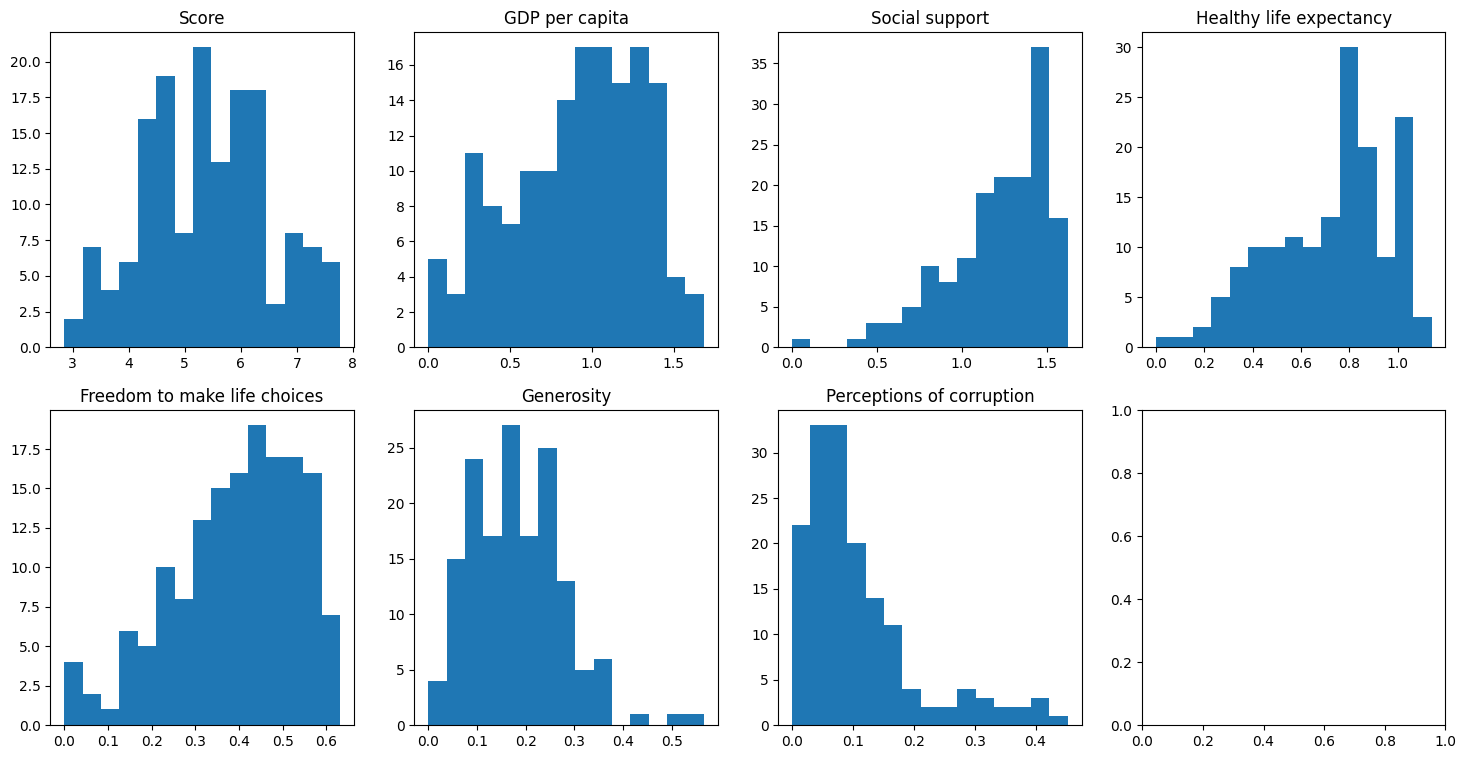

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9))
axs = axs.flatten() 

country_parameters = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for i, country_parameter in enumerate(country_parameters):
    axs[i].hist(hapiness[country_parameter], bins=15)
    axs[i].set_title(country_parameter)

### Задание 5: Проверка гипотез
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.


In [1]:
import pandas as pd

students = pd.read_csv("StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

students = pd.read_csv("StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


t-статистика: 5.398
p-value: 0.00000
Статистически значимо


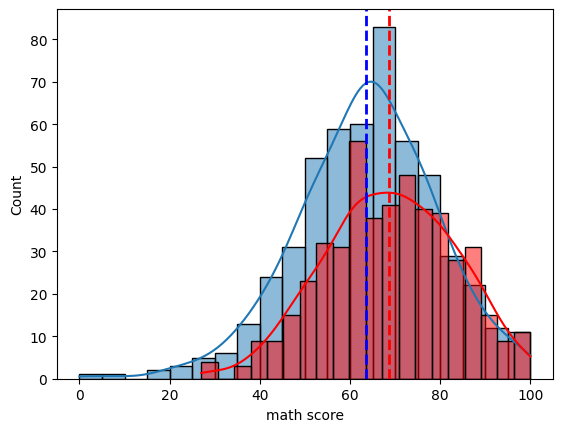

In [23]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def check_p(p):
    print("Статистически значимо" if p < 0.05 else "Cтатистически не  значимо")

students = pd.read_csv("StudentsPerformance.csv")

math_male = students.loc[students["gender"] == "male", "math score"]
math_female = students.loc[students["gender"] == "female", "math score"]
sns.histplot(math_female, bins=20, kde=True)
sns.histplot(math_male, bins=20, color="red", kde=True)
plt.axvline(math_female.mean(), color="blue", linestyle="--", linewidth=2)
plt.axvline(math_male.mean(), color="red", linestyle="--", linewidth=2)
t_stat, p_val = stats.ttest_ind(math_male, math_female, equal_var=False)
print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")
check_p(p_val)

t-статистика: -4.179
p-value: 0.00003
Статистически значимо


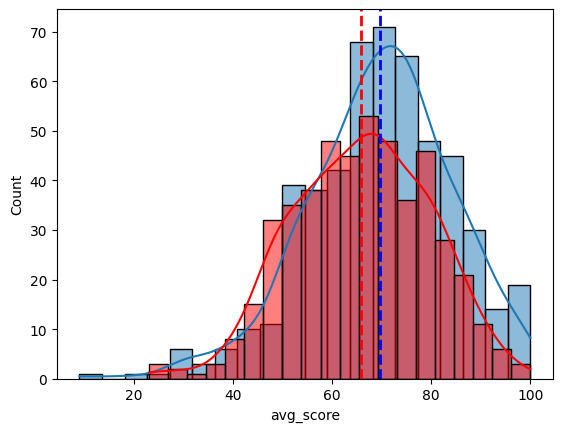

In [ ]:
students["avg_score"] = students[["math score", "reading score", "writing score"]].mean(axis=1)
avg_male = students.loc[students["gender"] == "male", "avg_score"]
avg_female = students.loc[students["gender"] == "female", "avg_score"]

sns.histplot(avg_female, bins=20, kde=True, label="Female")
sns.histplot(avg_male, bins=20, color="red", kde=True, label="Male")
plt.axvline(avg_female.mean(), color="blue", linestyle="--", linewidth=2)
plt.axvline(avg_male.mean(), color="red", linestyle="--", linewidth=2)
t_stat, p_val = stats.ttest_ind(avg_male, avg_female, equal_var=False)

print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")
check_p(p_val)

t-статистика: -8.595
p-value: 0.00000
Статистически значимо


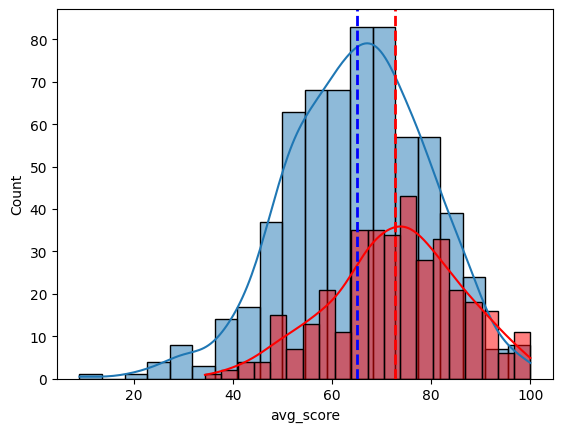

In [24]:
students["avg_score"] = students[["math score", "reading score", "writing score"]].mean(axis=1)
avg_none_course = students.loc[students["test preparation course"] == "none", "avg_score"]
avg_completed_course = students.loc[students["test preparation course"] == "completed", "avg_score"]

sns.histplot(avg_none_course, bins=20, kde=True)
sns.histplot(avg_completed_course, bins=20, color="red", kde=True)
plt.axvline(avg_none_course.mean(), color="blue", linestyle="--", linewidth=2)
plt.axvline(avg_completed_course.mean(), color="red", linestyle="--", linewidth=2)
t_stat, p_val = stats.ttest_ind(avg_none_course, avg_completed_course, equal_var=False)

print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")
check_p(p_val)